In [1]:
from regen.dataset import DynamicDamageDataset
from regen.model import NCA3DDamageDetection
from regen.trainer import NCA3DTrainer
from regen.utils import plot_voxels, save_weights
import numpy as np
import torch
import torch.nn.functional as F

In [2]:
labels = np.load('../data/ydata_7class.npy')
shapes = np.load('../data/xdata_7class.npy')

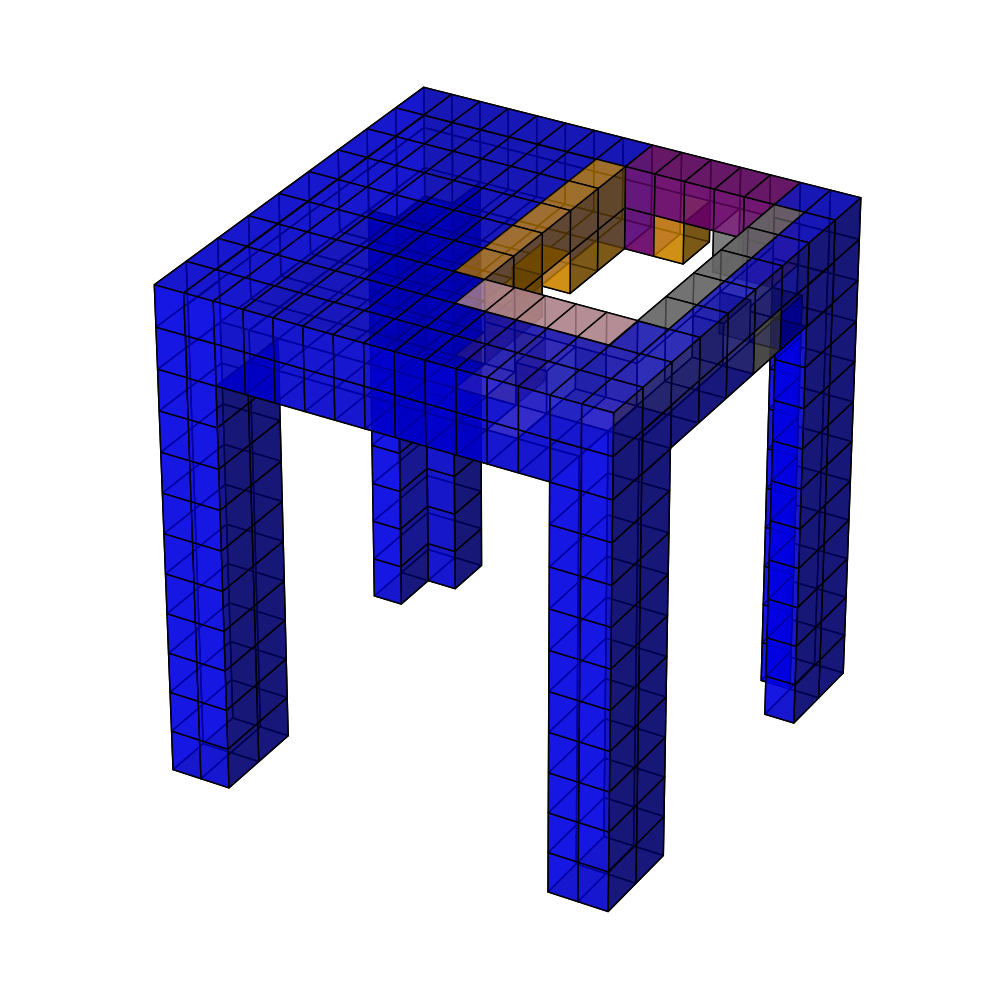

In [7]:
dataset = DynamicDamageDataset(shapes, labels, damage_radius_range=(2, 3), damage_types=["sphere", "cube", "random"], random_proportion_range=(0.1, 0.2), fixed_damage=False, augment_rotations=False, return_damage_mask=True, seed=None, filter_label=3)
shape = dataset.shapes[0]

damage_mask, damage_direction = dataset._generate_damage(shape, damage_type="sphere")
sphere_no_damage_img = plot_voxels(live_mask=damage_mask.astype(np.uint8), damage_direction=damage_direction.astype(np.uint8)*0,   )
sphere_damage_img = plot_voxels(live_mask=damage_mask.astype(np.uint8), damage_direction=damage_direction.astype(np.uint8),   )
sphere_damage_img

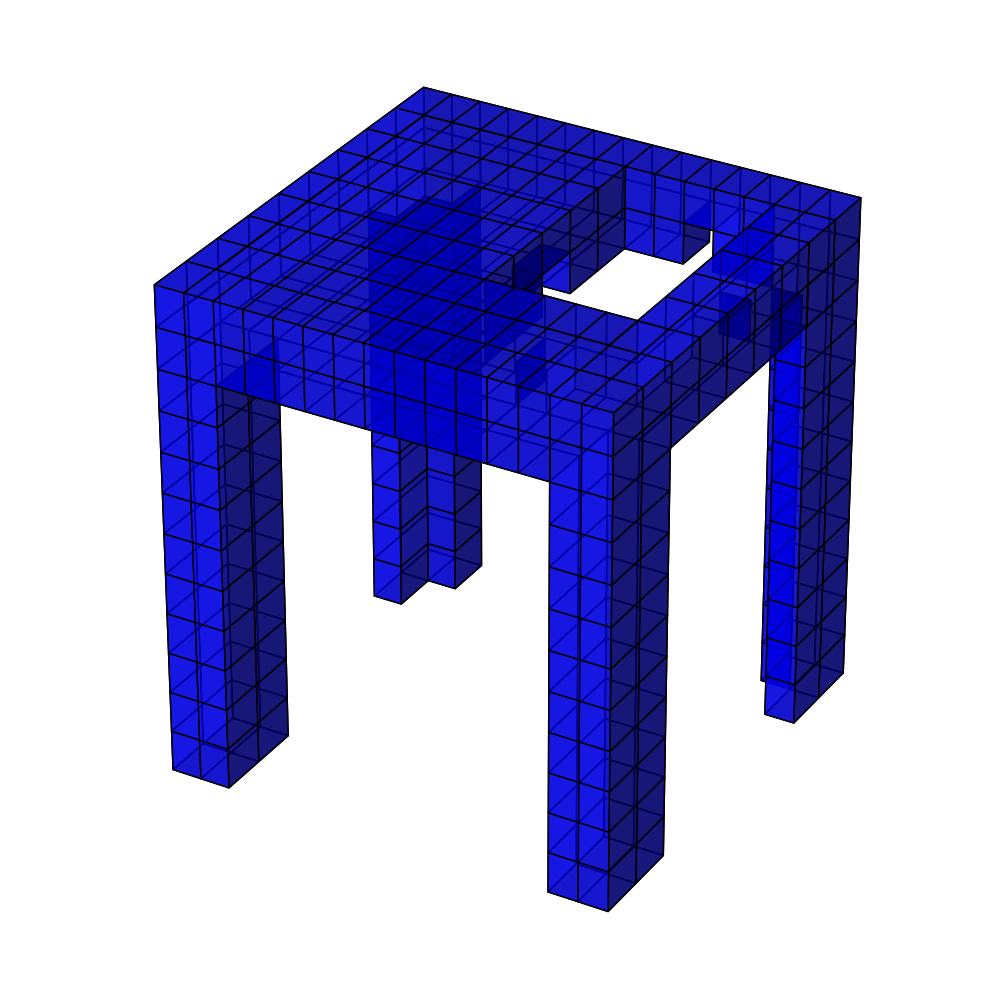

In [9]:
sphere_no_damage_img

In [12]:
damage_mask

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
damage_direction[damage_direction]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 2, 4, 2, 3, 4, 4, 3, 1,
       4, 1, 3, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])